# Import Modules

In [12]:
import uproot
import numpy as np
import scipy
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm
import pandas as pd
import math
from scipy import stats
import mpl_scatter_density
import os
import random
from scipy.spatial.distance import cdist

# Read and Define Emulsion Detector & IFT Data

In [4]:
IFT = uproot.open('../trackerspfit/trackerspfit.root')
IFT['spfit'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
evtId                | int32_t                  | AsDtype('>i4')
sp_track_x           | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_y           | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_z           | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_x_err       | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_y_err       | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_z_err       | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_x_predicted | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_y_predicted | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_z_predicted | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_x_residual  | std::vector<double>  

### Cluster data

In [5]:
cluster_global_x=IFT['spfit']['cluster_global_x'].array()
cluster_global_y=IFT['spfit']['cluster_global_y'].array()
cluster_global_z=IFT['spfit']['cluster_global_z'].array()

In [6]:
# As awkward arrays
tree = IFT['spfit']
ift = tree.arrays(['sp_track_x',
                   'sp_track_y',
                   'sp_track_z',
                   'sp_track_x_err',
                   'sp_track_y_err',
                   'sp_track_z_err',
                   'sp_track_x_predicted',
                   'sp_track_y_predicted',
                   'sp_track_z_predicted',
                   'sp_track_x_residual',
                   'sp_track_y_residual',
                   'sp_track_z_residual',
                   'track_p1',
                   'track_p3'], library='ak')

In [7]:
x = np.array(IFT["spfit"]["sp_track_x"])
y = np.array(IFT["spfit"]["sp_track_y"])
z = np.array(IFT["spfit"]["sp_track_z"])
x_err = np.array(IFT["spfit"]["sp_track_x_err"])
y_err = np.array(IFT['spfit']['sp_track_y_err'])
p1 = np.array(IFT["spfit"]["track_p1"])  # tx
p3 = np.array(IFT["spfit"]["track_p3"])  # ty

def define_data(f,num):
    var = []
    f = f[len(f[:])!=0]

    for i in range(len(f[0])):
        if len(f[:,i][0]) == 3:
            var.append(f[:,i][0][num])
    return var

x_FIRST = define_data(x,0)
y_FIRST = define_data(y,0)
z_FIRST = define_data(z,0)
x_err_FIRST = define_data(x_err,0)
y_err_FIRST = define_data(y_err,0)
tx_FIRST = define_data(p1,0)
ty_FIRST = define_data(p3,0)


dict1 = {"x":x_FIRST, "y":y_FIRST, "z":z_FIRST, 'x error':x_err_FIRST, 'y error':y_err_FIRST, "tx":tx_FIRST, "ty":ty_FIRST}
mini_IFT = pd.DataFrame(dict1)

In [14]:
mini_IFT

,x,y,z,x error,y error,tx,ty
0,13.996799,54.954617,243.705002,0.80009,0.015997,-7.296761e-08,0.024751
1,-27.997734,29.149456,246.794998,0.79959,0.032492,-3.174809e-02,-0.002556
2,-114.003464,35.670761,246.794998,0.79959,0.032492,-3.174817e-02,-0.007636
3,108.003067,13.946415,243.705002,0.80009,0.015997,1.906623e-07,-0.000651
4,68.000397,-61.635952,251.649994,0.80009,0.015997,-2.799747e-07,-0.005844
...,...,...,...,...,...,...,...
66278,-13.996799,-43.992424,238.850006,0.79959,0.032492,-1.699724e-07,-0.022243
66279,78.001068,-117.974472,243.705002,0.80009,0.015997,-1.587433e-02,-0.013034
66280,100.002533,-95.129906,243.705002,0.80009,0.015997,-2.025815e-07,-0.007001
66281,-92.001999,-90.168915,246.794998,0.79959,0.032492,6.349654e-02,0.042532


In [15]:
x_SEC = define_data(x,1)
y_SEC = define_data(y,1)
z_SEC = define_data(z,1)
x_err_SEC = define_data(x_err,1)
y_err_SEC = define_data(y_err,1)
tx_SEC = define_data(p1,1)
ty_SEC= define_data(p3,1)
dict2 = {"x":x_SEC, "y":y_SEC, "z":z_SEC, 'x error':x_err_SEC, 'y error':y_err_SEC, "tx":tx_SEC, "ty":ty_SEC}
mini_IFT2 = pd.DataFrame(dict2)

In [16]:
x_THIRD = define_data(x,2)
y_THIRD = define_data(y,2)
z_THIRD = define_data(z,2)
x_err_THIRD = define_data(x_err,2)
y_err_THIRD = define_data(y_err,2)
tx_THIRD = define_data(p1,2)
ty_THIRD= define_data(p3,2)
dict3 = {"x":x_THIRD, "y":y_THIRD, "z":z_THIRD, 'x error':x_err_THIRD, 'y error':y_err_THIRD, "tx":tx_THIRD, "ty":ty_THIRD}
mini_IFT3 = pd.DataFrame(dict3)

### Unique z coordinates in IFT

In [17]:
print('First layer',np.unique(z_FIRST))
print('Second layer',np.unique(z_SEC))
print('Last layer',np.unique(z_THIRD))

First layer [238.8500061  243.70500183 246.79499817 251.6499939 ]
Second layer [270.3500061  275.20498657 278.29501343 283.1499939 ]
Last layer [301.8500061  306.70498657 309.79501343 314.6499939 ]


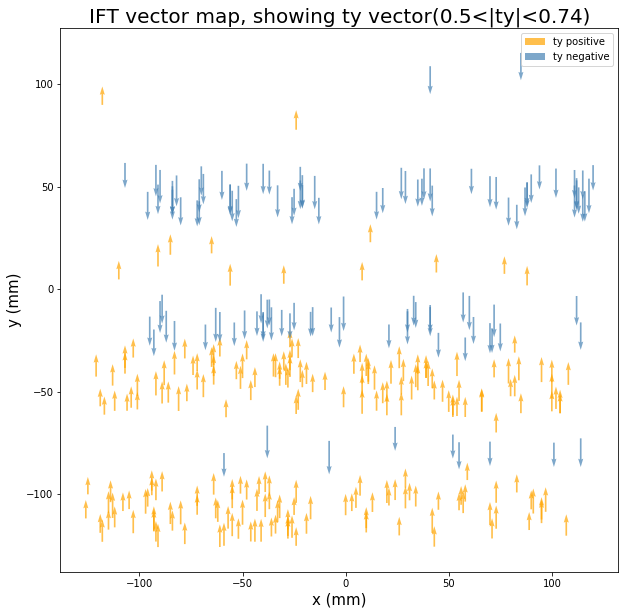

In [10]:
plt.figure(figsize=(10,10))
cut_ift=mini_IFT[abs(mini_IFT['ty'])>0.5]
cut_ift=cut_ift[abs(cut_ift['ty'])<0.74]
ty_pos=cut_ift[cut_ift['ty']>=0]
ty_neg=cut_ift[cut_ift['ty']<0]
plt.quiver(ty_pos['x'], ty_pos['y'], np.zeros(len(ty_pos['ty'])), ty_pos['ty'], color='orange', alpha=0.7, width=0.003,label='ty positive')
plt.quiver(ty_neg['x'], ty_neg['y'], np.zeros(len(ty_neg['ty'])), ty_neg['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('IFT vector map, showing ty vector(0.5<|ty|<0.74)', fontsize=20)

plt.legend(loc='upper right')
plt.show()

### Resolution in x & y direction (experiment)

In [19]:
print(f'resolution in x-axis: {np.mean(ak.flatten(ift["sp_track_x_err"], axis=-1))} mm; resolution in y-axis: {np.mean(ak.flatten(ift["sp_track_y_err"], axis=-1))} mm')

resolution in x-axis: 0.7998243723159739 mm; resolution in y-axis: 0.02476208347702279 mm


In [14]:
 # pre-process using PANDAS
area1_1 = pd.read_csv("../trackerspfit/chk_trks_area1-1_20220203.txt", sep='\s+', header=None)
area1_2 = pd.read_csv("../trackerspfit/chk_trks_area1-2_20220203.txt", sep='\s+', header=None)
area1_3 = pd.read_csv("../trackerspfit/chk_trks_area1-3_20220203.txt", sep='\s+', header=None)
area1_4 = pd.read_csv("../trackerspfit/chk_trks_area1-4_20220203.txt", sep='\s+', header=None)

combine = area1_1.append(area1_2, ignore_index=True)
combine = combine.append(area1_3, ignore_index=True)

emulsion = combine.append(area1_4, ignore_index=True)
emulsion.columns = ["t->ID", "plate_first", "plate_last", "x_last", "y_last", "z_last", 
                    "tx_last", "ty_last", "tx_pos", "ty_pos", "t->N()", "t->Npl()"]
emulsion_20 = emulsion[emulsion["plate_last"] == 20]
emulsion

,t->ID,plate_first,plate_last,x_last,y_last,z_last,tx_last,ty_last,tx_pos,ty_pos,t->N(),t->Npl()
0,132,11,19,25906.1,13061.3,-1275.5,-0.0029,0.4746,-0.0132,0.4790,8,9
1,520,11,16,60489.5,10359.9,-5164.6,-0.0784,0.3031,-0.0780,0.3110,5,6
2,975,11,16,24787.5,12273.8,-5164.6,-0.1193,0.5103,-0.1216,0.5141,5,6
3,1078,11,18,31220.8,10107.3,-2550.9,-0.0326,0.0047,-0.0347,0.0087,7,8
4,1133,11,20,36792.7,10195.3,0.0,0.0214,0.0106,0.0083,0.0084,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...
201377,104635,11,20,99630.2,89909.1,0.0,0.0133,-0.0105,0.0139,-0.0120,10,10
201378,104637,11,20,107504.5,89421.5,0.0,0.0077,-0.0092,0.0065,-0.0071,7,10
201379,104639,11,20,111570.5,88849.8,0.0,0.0114,-0.0101,0.0114,-0.0121,9,10
201380,104725,11,20,89414.9,89955.5,0.0,-0.0103,-0.0217,-0.0086,-0.0171,8,10


## Apply filter to Emulsion & IFT data

In [25]:
cut_emu= emulsion_20[abs(emulsion_20["ty_last"]) > 0.65]
cut_emu= cut_emu[abs(cut_emu["ty_last"]) <0.7]

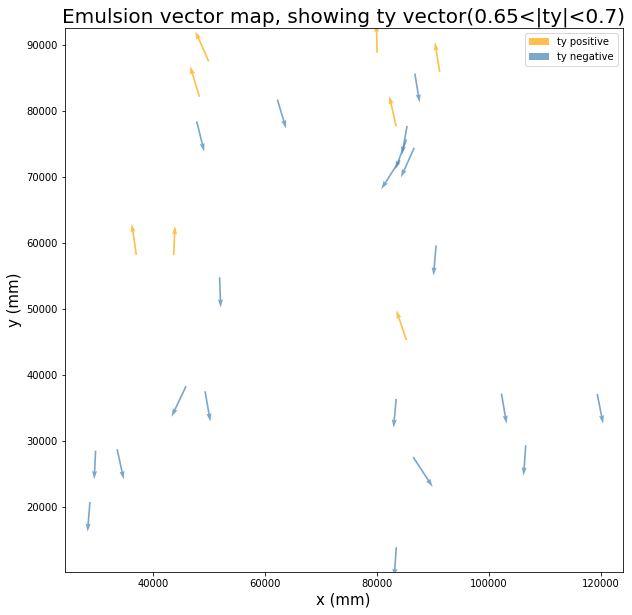

In [27]:


plt.figure(figsize=(10,10))
ty_pos=cut_emu[cut_emu['ty_last']>=0]
ty_neg=cut_emu[cut_emu['ty_last']<0]
plt.quiver(ty_pos['x_last'], ty_pos['y_last'], ty_pos['tx_last'], ty_pos['ty_last'], color='orange', alpha=0.7, width=0.003,label='ty positive')
plt.quiver(ty_neg['x_last'], ty_neg['y_last'], ty_neg['tx_last'], ty_neg['ty_last'], color='steelblue', alpha=0.7, width=0.003,label='ty negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('Emulsion vector map, showing ty vector(0.65<|ty|<0.7)', fontsize=20)



plt.legend(loc='upper right')
plt.show()

In [21]:
 #filter1 = emulsion_20[abs(emulsion_20["tx_last"]) > 0.1]
#filter_xmax = emulsion_20[abs(emulsion_20["tx_last"]) > 0.1]

filter2 = emulsion_20[abs(emulsion_20["ty_last"]) > 0.05]

emulsion_pheri = filter2

In [22]:
std_custom = 0.4
def normalProbabilityDensity(x):
    constant = 1 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2)/2))
result, _ = scipy.integrate.quad(normalProbabilityDensity, -std_custom, std_custom, limit = 1000)
print(f'{round(result*100, 6)}% of all data is included in {std_custom} standard deviation for perfect normal distribution')

31.084348% of all data is included in 0.4 standard deviation for perfect normal distribution


In [29]:
np.std(emulsion_20["ty_last"].to_numpy())

0.04518947803556487

# Angle Correction

## tx & ty distribution (-0.1, 0.1)

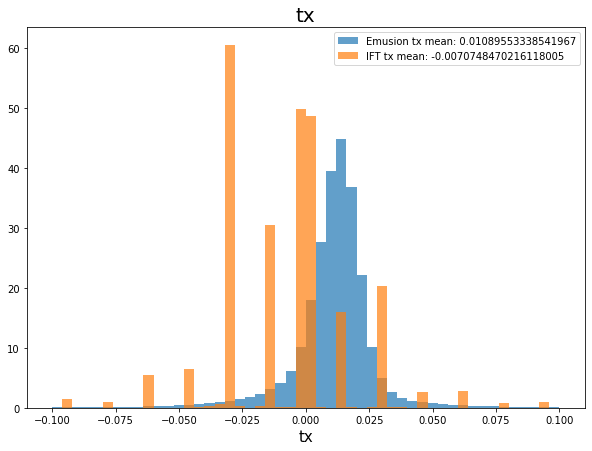

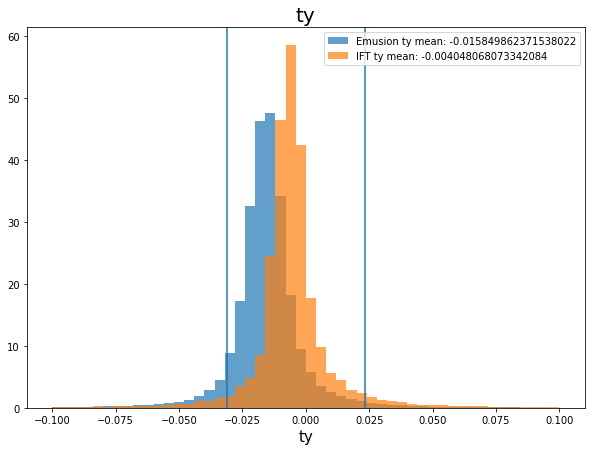

In [23]:
# tx
plt.figure(figsize=(10, 7))
emu_mean, ift_mean = np.mean(emulsion_20['tx_last']), np.mean(mini_IFT['tx'])
plt.hist(emulsion_20['tx_last'], bins=np.linspace(-0.1, 0.1, 51), alpha=0.7, density=True, label=f'Emusion tx mean: {emu_mean}')
plt.hist(mini_IFT['tx'], bins=np.linspace(-0.1, 0.1, 51), alpha=0.7, density=True, label=f'IFT tx mean: {ift_mean}')
plt.xlabel('tx', fontsize=15)
plt.title('tx', fontsize=20)
plt.legend()
plt.show()

# ty
plt.figure(figsize=(10, 7))
emu_mean, ift_mean, ift_std = np.mean(emulsion_20['ty_last']), np.mean(mini_IFT['ty']), np.std(mini_IFT['ty'])

plt.hist(emulsion_20['ty_last'], bins=np.linspace(-0.1, 0.1, 51), alpha=0.7, density=True, label=f'Emusion ty mean: {emu_mean}')
plt.hist(mini_IFT['ty'], bins=np.linspace(-0.1, 0.1, 51), alpha=0.7, density=True, label=f'IFT ty mean: {ift_mean}')
plt.axvline( x = ift_mean + std_custom*ift_std)
plt.axvline( x = ift_mean - std_custom*ift_std)
plt.xlabel('ty', fontsize=15)
plt.title('ty', fontsize=20)
plt.legend()
plt.show()


## Angle Correction Function in y-z plane

In [24]:
# Angle Correction in y-z coordinate
def AngleCorr_yz(tx, ty):
    # y/x = ty/tx, z/y = 1/ty
    theta = np.ones(len(tx))
    for i in tqdm(range(len(tx))):
        if tx[i] > 0:
            theta[i] = np.arctan(np.sqrt(ty[i]**2 +1) / tx[i] )
        elif tx[i] < 0:
            theta[i] = np.arctan(np.sqrt(ty[i]**2 +1) /tx[i] ) + np.pi
        elif tx[i] == 0 and np.sqrt(ty[i]**2 + 1) > 0:
            theta[i] = np.pi/2
        elif tx[i] == 0 and np.sqrt(ty[i]**2 + 1) == 0:
            print(f'At Event {i}, there occurs both tx & ty values are zero (tx:{tx[i]}, ty:{ty[i]})')
            theta[i] = np.nan
        else:
            print('occur error')
    phi = np.arctan(ty)
    return theta, phi
theta_emu, phi_emu = AngleCorr_yz(np.array(emulsion_20['tx_last']), np.array(emulsion_20['ty_last']))
theta_ift, phi_ift = AngleCorr_yz(np.array(mini_IFT['tx']), np.array(mini_IFT['ty']))

100%|██████████████████████████████████████████████████████████████████████████████| 66283/66283 [00:00<00:00, 182077.87it/s]


## Testing: Proved that the Calculated tx, ty, tz values using theta and phi are consistent.

In [25]:
# Testing theta and phi formula
tz_test = np.cos(phi_emu) * np.sin(theta_emu)
ty_test = np.sin(phi_emu) * np.sin(theta_emu) / tz_test
tx_test = np.cos(theta_emu) / tz_test


pd.DataFrame({'tx_data': emulsion_20['tx_last'],
              'ty_data': emulsion_20['ty_last'],
              'tx_calculated': tx_test,
              'ty_calculated': ty_test,
              'tz_calculated': tz_test})

,tx_data,ty_data,tx_calculated,ty_calculated,tz_calculated
4,0.0214,0.0106,0.0214,0.0106,0.999715
5,0.0032,0.0385,0.0032,0.0385,0.999255
6,0.0118,-0.0137,0.0118,-0.0137,0.999837
7,0.0271,0.0221,0.0271,0.0221,0.999389
8,0.0102,0.0159,0.0102,0.0159,0.999822
...,...,...,...,...,...
201377,0.0133,-0.0105,0.0133,-0.0105,0.999856
201378,0.0077,-0.0092,0.0077,-0.0092,0.999928
201379,0.0114,-0.0101,0.0114,-0.0101,0.999884
201380,-0.0103,-0.0217,-0.0103,-0.0217,0.999712


# tx & ty distribution after the shift

[]

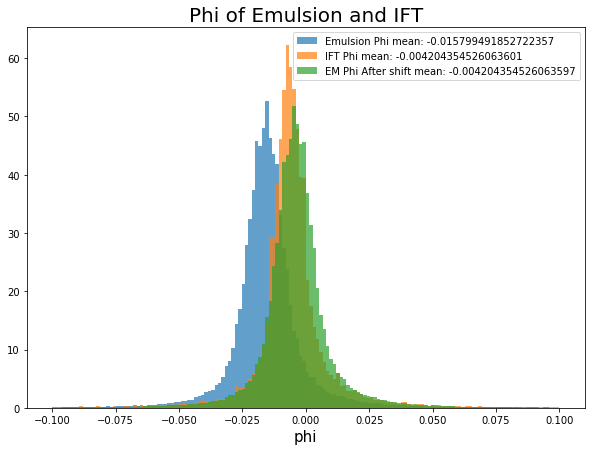

In [26]:
# Comparsion
plt.figure(figsize=(10,7))
delta_phi = np.abs( np.nanmean(phi_emu) - np.mean(phi_ift) )
phi_emu_tmp = phi_emu + delta_phi
bin = np.linspace(-0.1, 0.1, 151)
#p_emu = np.array([i-2*np.pi if i > np.pi else i for i in phi_emu_tmp])
plt.hist(phi_emu, bins=bin, density=True, alpha=0.7, label=f'Emulsion Phi mean: {np.nanmean(phi_emu)}')
plt.hist(phi_ift, bins=bin, density=True, alpha=0.7, label=f'IFT Phi mean: {np.mean(phi_ift)}')
'''
tmp1 = np.array([i+2*np.pi if i < 0 else i for i in p_emu])
tmp2 = np.array([i+2*np.pi if i < 0 else i for i in phi_ift])
plt.hist(tmp1, bins=np.linspace(0, 2*np.pi, 101), density=True, alpha=0.7, label=f'Emulsion Phi mean: {np.nanmean(phi_emu)}')
plt.hist(tmp2, bins=np.linspace(0, 2*np.pi, 101), density=True, alpha=0.7, label=f'IFT Phi mean: {np.mean(phi_ift)}')
'''
plt.hist(phi_emu_tmp, bins=bin, density=True, alpha=0.7, label=f'EM Phi After shift mean: {np.nanmean(phi_emu_tmp)}')

plt.title('Phi of Emulsion and IFT', fontsize=20)
plt.xlabel('phi', fontsize=15)
plt.legend()
plt.plot()

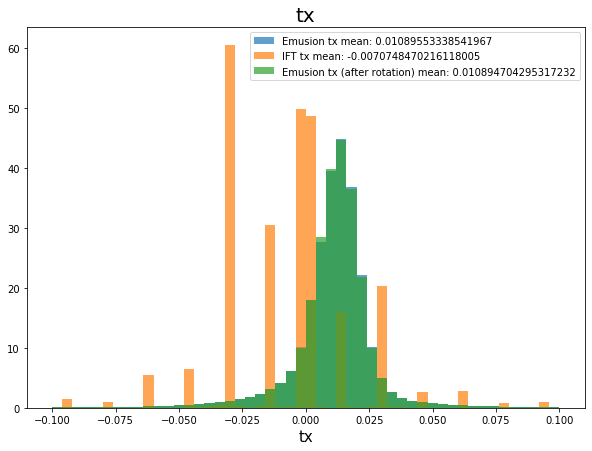

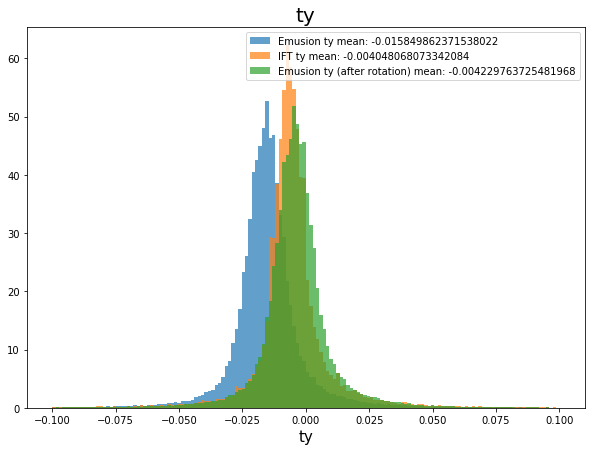

In [27]:
phi_emu_tmp = phi_emu + delta_phi
p_emu = np.array([i-2*np.pi if i > np.pi else i for i in phi_emu_tmp])

tz_test = np.cos(p_emu) * np.sin(theta_emu)
ty_test = np.sin(p_emu) * np.sin(theta_emu) / tz_test
tx_test = np.cos(theta_emu) / tz_test

#tx
plt.figure(figsize=(10, 7))
emu_mean, ift_mean = np.mean(emulsion_20['tx_last']), np.mean(mini_IFT['tx'])
plt.hist(emulsion_20['tx_last'], bins=np.linspace(-0.1, 0.1, 51), alpha=0.7, density=True, label=f'Emusion tx mean: {emu_mean}')
plt.hist(mini_IFT['tx'], bins=np.linspace(-0.1, 0.1, 51), alpha=0.7, density=True, label=f'IFT tx mean: {ift_mean}')
plt.hist(tx_test, bins=np.linspace(-0.1, 0.1, 51), alpha=0.7, density=True, label=f'Emusion tx (after rotation) mean: {np.nanmean(tx_test)}')
plt.xlabel('tx', fontsize=15)
plt.title('tx', fontsize=20)
plt.legend()
plt.show()

# ty
plt.figure(figsize=(10, 7))
 
bin = np.linspace(-0.1, 0.1, 151)
emu_mean, ift_mean = np.mean(emulsion_20['ty_last']), np.mean(mini_IFT['ty'])
plt.hist(emulsion_20['ty_last'], bins=bin, alpha=0.7, density=True, label=f'Emusion ty mean: {emu_mean}')
plt.hist(mini_IFT['ty'], bins=bin, alpha=0.7, density=True, label=f'IFT ty mean: {ift_mean}')
plt.hist(ty_test, bins=bin, alpha=0.7, density=True, label=f'Emusion ty (after rotation) mean: {np.nanmean(ty_test)}')
plt.xlabel('ty', fontsize=15)
plt.title('ty', fontsize=20)
plt.legend()
plt.show()

In [28]:
ift_mean

-0.004048068073342084

### Comments: Function that rotates around the center of emulsion: (70mm, 50mm)

In [29]:
Delta_phi = delta_phi
xc, yc, zc = 70000, 50000, 0
def CoorShift(x, y, tx_emu, ty_emu):
    z = np.zeros(len(x))
    theta_emu, phi_emu = AngleCorr_yz(tx_emu, ty_emu)

    z_new = (z-zc)*np.cos(Delta_phi) - (y-yc)*np.sin(Delta_phi) + zc
    y_new = (z-zc)*np.sin(Delta_phi) + (y-yc)*np.cos(Delta_phi) + yc

    tz_new = np.cos(phi_emu + delta_phi) * np.sin(theta_emu)
    ty_new = np.sin(phi_emu + delta_phi) * np.sin(theta_emu) / tz_new
    tx_new = np.cos(theta_emu) / tz_new

    return z_new, x, y_new, tx_new, ty_new, tz_new



## Proved that the angle rotation is rotating counterclockwise 60 degrees.

(-5, 5)

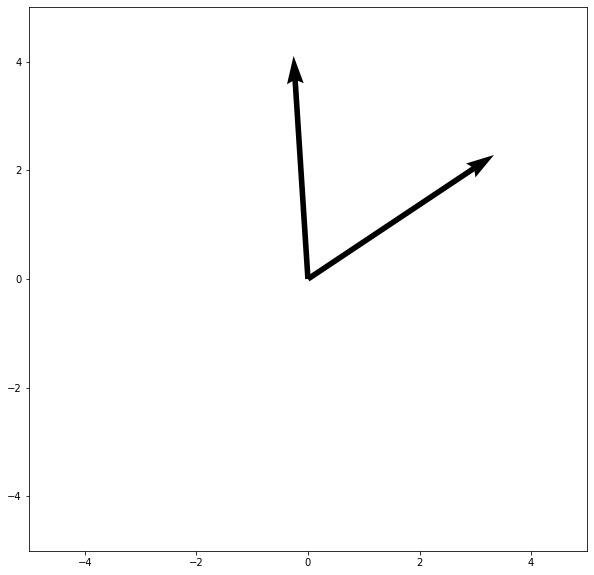

In [30]:
plt.figure(figsize=(10, 10))
dp = np.pi/3
point = [3, 2]
plt.quiver(0, 0, point[0], point[1], width=0.01, scale=9)
xn = point[0]*np.cos(dp) - point[1]*np.sin(dp) 
yn = point[0]*np.sin(dp) + point[1]*np.cos(dp)
plt.quiver(0, 0, xn, yn, width=0.01, scale=9)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Extrapolate

### Comments: the distance between the last film of the Emulsion Detector and the first layer of the IFT is EXPLAINED in the slides = 55.5 mm.

In [33]:
DistEmuIft = 55500

def Emu2Ift_Coor(x, y, tx, ty, mm=False, um=False, rotate=False):
    # Angle Rotation
    z_rot, x_rot, y_rot, tx_rot, ty_rot, tz_rot = CoorShift(x, y, tx, ty)

    # Projection
    x_new = (DistEmuIft-z_rot) * tx_rot + x
    y_new = (DistEmuIft-z_rot) * ty_rot + y_rot

    # Transition
    x_ift_pred = x_new - 70000
    y_ift_pred = y_new - 60000

    if um:
        dict = {'x': x_ift_pred, 'y': y_ift_pred, 'tx': tx_rot, 'ty': ty_rot, 'tz': tz_rot}
        return pd.DataFrame(dict)
    elif mm:
        dict = {'x': x_ift_pred/1e3, 'y': y_ift_pred/1e3, 'tx': tx_rot, 'ty': ty_rot, 'tz': tz_rot}
        return pd.DataFrame(dict)

## Visualize the projection of Emulsion onto IFT

In [34]:
emu_pred = Emu2Ift_Coor(ak.Array(emulsion_20['x_last']), ak.Array(emulsion_20['y_last']), ak.Array(emulsion_20['tx_last']), ak.Array(emulsion_20['ty_last']), mm=True)

100%|██████████████████████████████████████████████████████████████████████████████| 166390/166390 [00:17<00:00, 9485.29it/s]


In [35]:
z_rot, x_rot, y_rot, tx_rot, ty_rot, tz_rot = CoorShift(ak.Array(emulsion_20['x_last']), ak.Array(emulsion_20['y_last']), ak.Array(emulsion_20['tx_last']), ak.Array(emulsion_20['ty_last']))

100%|██████████████████████████████████████████████████████████████████████████████| 166390/166390 [00:17<00:00, 9418.30it/s]


In [36]:
rot_emu=np.array((z_rot, x_rot,y_rot, tx_rot, ty_rot, tz_rot)).T

In [37]:
rot_emu[0]

array([4.61530621e+02, 3.67927000e+04, 1.01979758e+04, 2.14040695e-02,
       2.21983855e-02, 9.99524888e-01])

In [38]:
pd.DataFrame({'x': emulsion_20['x_last'],
              'y': emulsion_20['y_last'],
              'z': np.zeros(len(emulsion_20)),
              'y_rot': y_rot,
              'z_loc': z_rot})

,x,y,z,y_rot,z_loc
4,36792.7,10195.3,0.0,10197.975785,461.530621
5,40903.2,10267.5,0.0,10270.170932,460.693471
6,42117.5,10041.1,0.0,10043.786151,463.318551
7,41940.2,10029.5,0.0,10032.186931,463.453051
8,44306.5,10580.6,0.0,10583.249884,457.063114
...,...,...,...,...,...
201377,99630.2,89909.1,0.0,89906.417196,-462.741126
201378,107504.5,89421.5,0.0,89418.849974,-457.087464
201379,111570.5,88849.8,0.0,88847.188406,-450.458672
201380,89414.9,89955.5,0.0,89952.814077,-463.279128


In [39]:
z_loc = np.zeros(len(emulsion_20))
y_loc = np.array(emulsion_20['y_last'])
corr_bef, corr_after = np.column_stack((z_loc, y_loc)), np.column_stack((z_loc+55500, y_loc+55500*np.array(emulsion_20['ty_last'])))
corr_rot_bef, corr_rot_aft = np.column_stack((z_rot, y_rot)), np.column_stack((z_rot+55500, y_rot+55500*ty_rot))

In [40]:
pd.DataFrame({'tx': tx_rot, 
              'ty': ty_rot, 
              'tz': tz_rot,
              'tx_old': emulsion_20['tx_last'],
              'ty_old': emulsion_20['ty_last']})

,tx,ty,tz,tx_old,ty_old
4,0.021404,0.022198,0.999525,0.0214,0.0106
5,0.003202,0.050118,0.998741,0.0032,0.0385
6,0.011799,-0.002104,0.999928,0.0118,-0.0137
7,0.027109,0.033704,0.999066,0.0271,0.0221
8,0.010203,0.027501,0.999570,0.0102,0.0159
...,...,...,...,...,...
201377,0.013299,0.001096,0.999911,0.0133,-0.0105
201378,0.007700,0.002395,0.999967,0.0077,-0.0092
201379,0.011399,0.001495,0.999934,0.0114,-0.0101
201380,-0.010298,-0.010102,0.999896,-0.0103,-0.0217


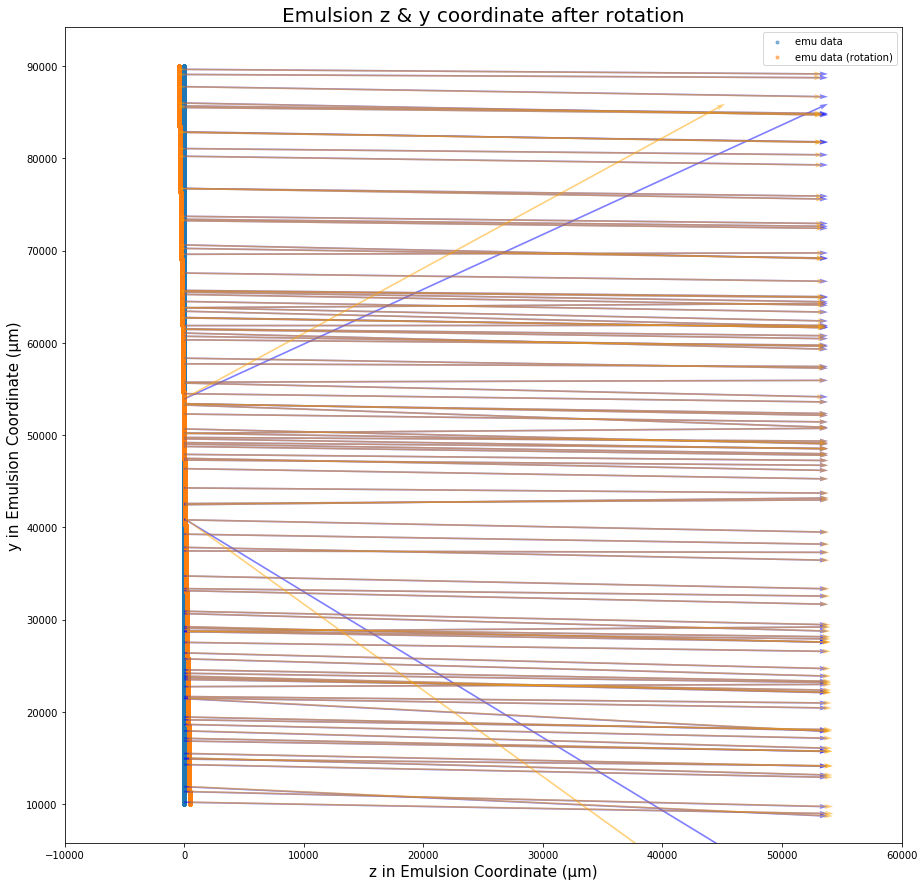

In [41]:
import random

emulsion
plt.figure(figsize=(15,15))
plt.scatter(np.ones(len(emulsion_20)), emulsion_20['y_last'], alpha=0.5, marker='.', label='emu data')
plt.scatter(z_rot, y_rot, alpha=0.5, marker='.', label='emu data (rotation)')

leng = 100
pos = random.sample(range(0, len(corr_bef)), leng)
plt.quiver(np.zeros(leng), [list(emulsion_20['y_last'])[i] for i in pos], np.ones(leng), [list(emulsion_20['ty_last'])[i] for i in pos], color='blue', alpha=0.5, width=0.002, scale=1.3)
plt.quiver([z_rot[i] for i in pos], [y_rot[i] for i in pos], [tz_rot[i] for i in pos], [list(emulsion_20['ty_last'])[i] for i in pos], color='orange', alpha=0.5, width=0.002, scale=1.3)

plt.xlim(-10000, 60000)
#plt.ylim(10000, 90000)
plt.xlabel('z in Emulsion Coordinate (μm)', fontsize=15)
plt.ylabel('y in Emulsion Coordinate (μm)', fontsize=15)
plt.title('Emulsion z & y coordinate after rotation', fontsize=20)
plt.legend()
plt.show()

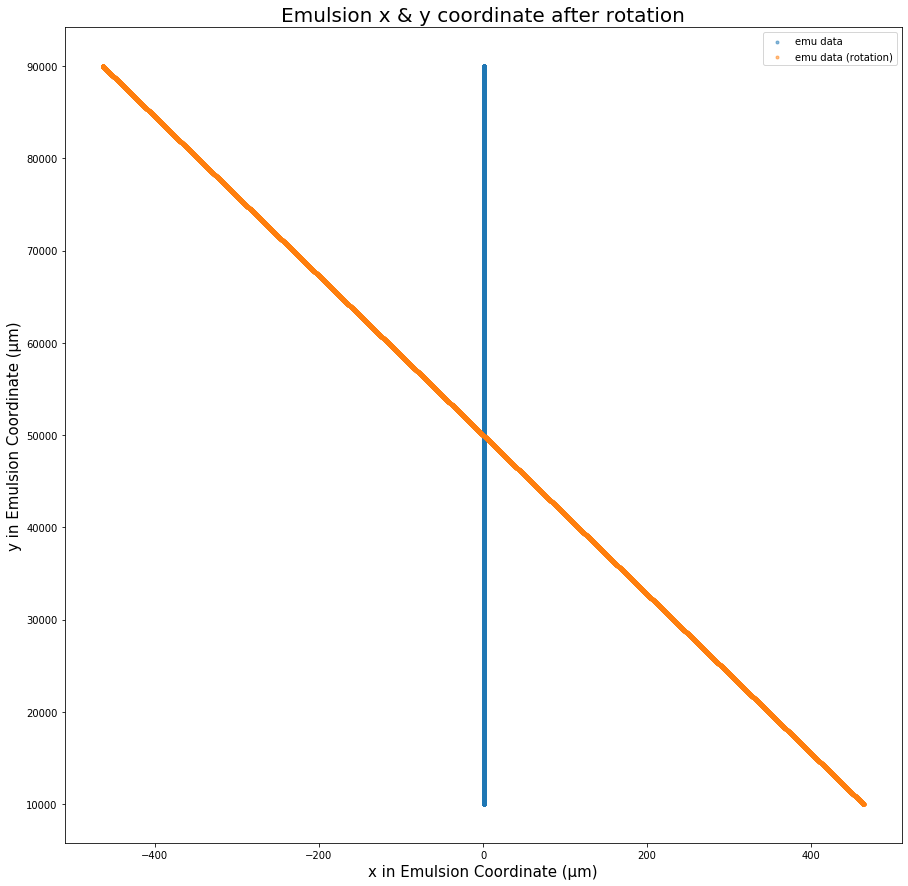

In [42]:
plt.figure(figsize=(15,15))
plt.scatter(np.ones(len(emulsion_20)), emulsion_20['y_last'], alpha=0.5, marker='.', label='emu data')
plt.scatter(z_rot, y_rot, alpha=0.5, marker='.', label='emu data (rotation)')
#plt.xlim(10000, 90000)
#plt.ylim(10000, 90000)
plt.xlabel('x in Emulsion Coordinate (μm)', fontsize=15)
plt.ylabel('y in Emulsion Coordinate (μm)', fontsize=15)
plt.title('Emulsion x & y coordinate after rotation', fontsize=20)
plt.legend()
plt.show()

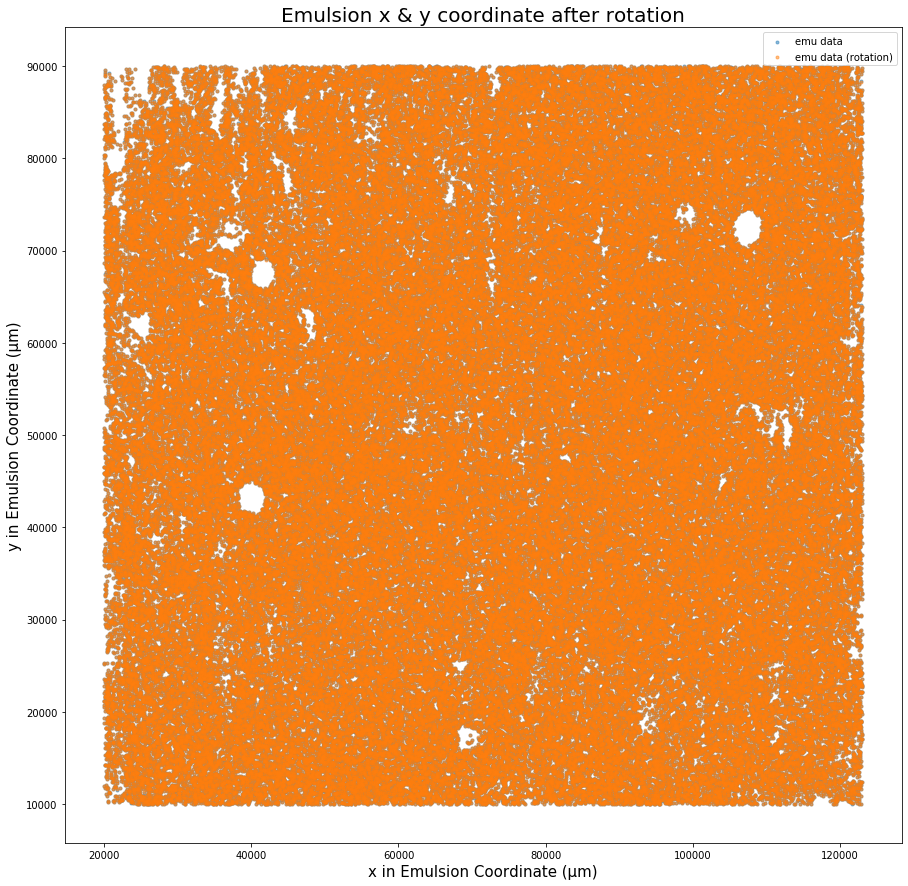

In [43]:
plt.figure(figsize=(15,15))
plt.scatter(emulsion_20['x_last'], emulsion_20['y_last'], alpha=0.5, marker='.', label='emu data')
plt.scatter(emulsion_20['x_last'], y_rot, alpha=0.5, marker='.', label='emu data (rotation)')
plt.xlabel('x in Emulsion Coordinate (μm)', fontsize=15)
plt.ylabel('y in Emulsion Coordinate (μm)', fontsize=15)
plt.title('Emulsion x & y coordinate after rotation', fontsize=20)
plt.legend()
plt.show()

In [44]:
emulsion_20

,t->ID,plate_first,plate_last,x_last,y_last,z_last,tx_last,ty_last,tx_pos,ty_pos,t->N(),t->Npl()
4,1133,11,20,36792.7,10195.3,0.0,0.0214,0.0106,0.0083,0.0084,9,10
5,1229,11,20,40903.2,10267.5,0.0,0.0032,0.0385,0.0001,0.0454,9,10
6,1256,11,20,42117.5,10041.1,0.0,0.0118,-0.0137,0.0092,-0.0099,9,10
7,1284,11,20,41940.2,10029.5,0.0,0.0271,0.0221,0.0169,0.0222,9,10
8,1373,11,20,44306.5,10580.6,0.0,0.0102,0.0159,0.0092,0.0271,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...
201377,104635,11,20,99630.2,89909.1,0.0,0.0133,-0.0105,0.0139,-0.0120,10,10
201378,104637,11,20,107504.5,89421.5,0.0,0.0077,-0.0092,0.0065,-0.0071,7,10
201379,104639,11,20,111570.5,88849.8,0.0,0.0114,-0.0101,0.0114,-0.0121,9,10
201380,104725,11,20,89414.9,89955.5,0.0,-0.0103,-0.0217,-0.0086,-0.0171,8,10


In [45]:
mean_emu=rot_emu[:,3].mean()
mean_emu

0.010894704295317232

In [46]:
cut_emu=rot_emu[abs(rot_emu[:,3]-mean_emu)<0.1]
cut_emu=cut_emu[abs(cut_emu[:,3])>0.05]
cut_emu[:,1]

array([ 27062.6,  33981.4,  33199.5, ..., 109460.8,  76525.5, 110899.5])

## Apply Cut on ty

In [15]:
ty_cut = 0.5
ift_mean = np.mean(mini_IFT['ty'])
ift_filter_greater = mini_IFT[mini_IFT['ty'] > ift_mean + ty_cut]
ift_filter_less = mini_IFT[mini_IFT['ty'] < ift_mean - ty_cut]
ift_filter = pd.concat([ift_filter_less, ift_filter_greater])
ift_filter = ift_filter[ift_filter['tx'] != 0]
print(len(ift_filter)/len(mini_IFT))
ift_filter

0.006306292714572364


,x,y,z,x error,y error,tx,ty
1271,-24.997534,-6.604947,238.850006,0.79959,0.032492,0.095244,-0.584895
1735,-14.996866,55.294685,246.794998,0.79959,0.032492,0.206363,-0.709046
1740,51.999332,-70.845047,243.705002,0.80009,0.015997,-0.317481,-0.509959
1750,112.003334,53.114250,243.705002,0.80009,0.015997,-0.253985,-0.630618
1751,-84.001465,50.233673,246.794998,0.79959,0.032492,0.603215,-0.602041
...,...,...,...,...,...,...,...
64276,84.001465,-44.392506,251.649994,0.80009,0.015997,0.047623,0.700124
64423,26.997667,-112.033287,243.705002,0.80009,0.015997,-0.317482,0.772837
64863,28.997801,-96.790237,243.705002,0.80009,0.015997,-0.380978,0.561366
65143,-115.003532,-107.472374,246.794998,0.79959,0.032492,-0.047622,0.499449


In [48]:
emu_mean = np.mean(emu_pred['ty'])
emu_filter_greater = emu_pred[emu_pred['ty'] > emu_mean + ty_cut]
emu_filter_less = emu_pred[emu_pred['ty'] < emu_mean - ty_cut]
emu_filter = pd.concat([emu_filter_less, emu_filter_greater])
emu_filter = emu_filter[emu_filter['tx'] != 0]
print(len(emu_filter)/len(emu_pred))
emu_filter

0.009099104513492398


,x,y,tx,ty,tz
3470,-19.546597,-66.354735,-0.130494,-0.392754,0.923993
4177,-21.899851,-55.900208,-0.170563,-0.264753,0.953815
4395,-23.197736,-67.793439,0.277723,-0.450379,0.883893
4999,-30.194506,-53.122977,0.188267,-0.283432,0.946697
6002,-10.893174,-50.421438,-0.121917,-0.264356,0.960142
...,...,...,...,...,...
165552,-14.930839,29.928836,-0.376123,0.402613,0.875858
165598,33.375620,22.809447,-0.032695,0.257025,0.968035
165865,15.132110,64.266985,-0.108550,0.686729,0.821058
166100,36.166457,43.938869,-0.059021,0.477056,0.901279


## Projection of Emulsion before cut & after cut

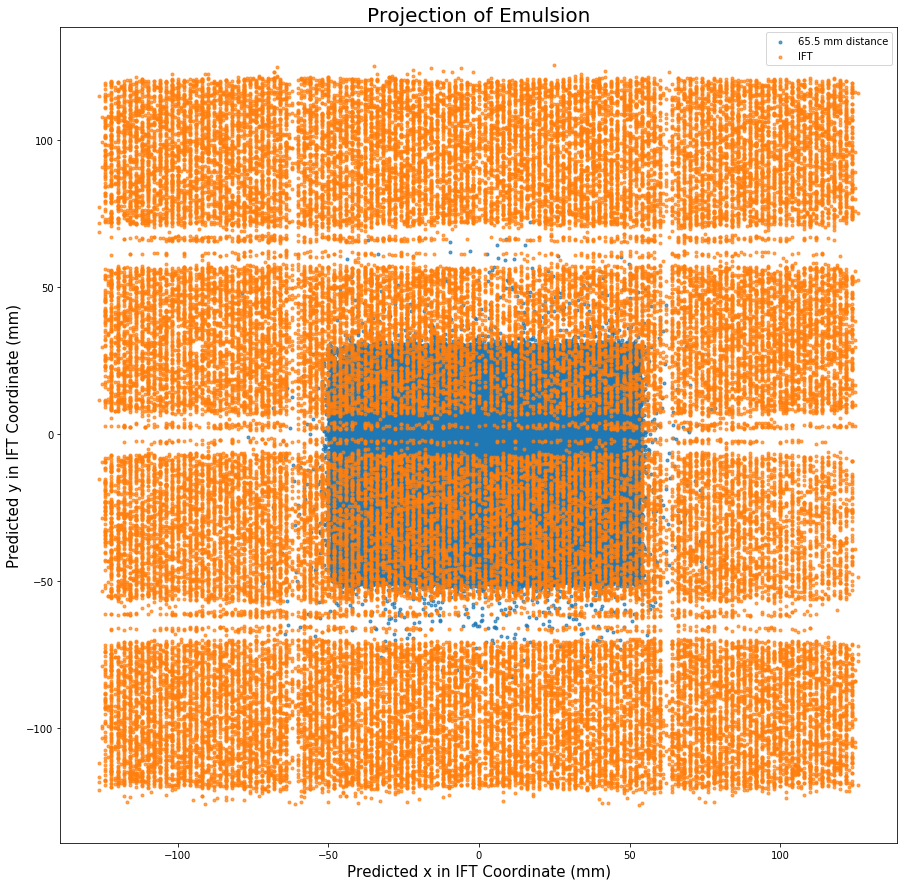

In [49]:
plt.figure(figsize=(15, 15))
plt.scatter(emu_pred['x'], emu_pred['y'], marker='.', alpha=0.7, label='65.5 mm distance')
plt.scatter(mini_IFT['x'], mini_IFT['y'], marker='.', alpha=0.7, label='IFT')
plt.xlabel('Predicted x in IFT Coordinate (mm)', fontsize=15)
plt.ylabel('Predicted y in IFT Coordinate (mm)', fontsize=15)
plt.title('Projection of Emulsion', fontsize=20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


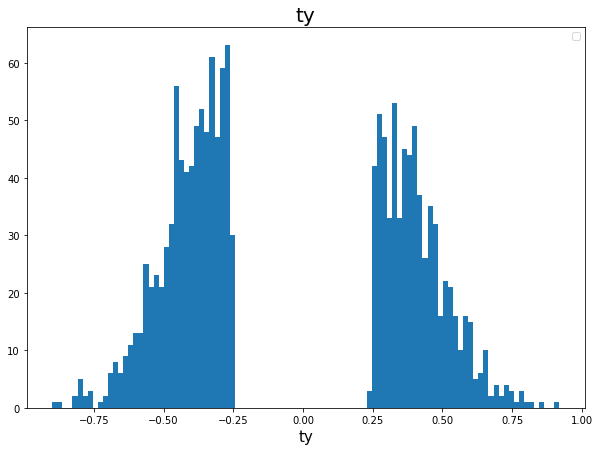

In [50]:
#phi_emu_tmp = phi_emu + delta_phi
#p_emu = np.array([i-2*np.pi if i > np.pi else i for i in phi_emu_tmp])

#tz_test = np.cos(p_emu) * np.sin(theta_emu)
#ty_test = np.sin(p_emu) * np.sin(theta_emu) / tz_test
#tx_test = np.cos(theta_emu) / tz_test

# ty
plt.figure(figsize=(10, 7))
 
#bin1 = np.linspace(-0.1, 0.1, 151)
#emu_mean, ift_mean = np.mean(emulsion_20['ty_last']), np.mean(mini_IFT['ty'])
#plt.hist(emulsion_20['ty_last'], bins=bin, alpha=0.7, density=True, label=f'Emusion ty mean: {emu_mean}')
#plt.hist(mini_IFT['ty'], bins=bin, alpha=0.7, density=True, label=f'IFT ty mean: {ift_mean}')
#plt.hist(ty_test, bins=bin, alpha=0.7, density=True, label=f'Emusion ty (after rotation) mean: {np.nanmean(ty_test)}')
plt.hist(emu_filter['ty'],bins=100)
plt.xlabel('ty', fontsize=15)
plt.title('ty', fontsize=20)
plt.legend()
plt.show()

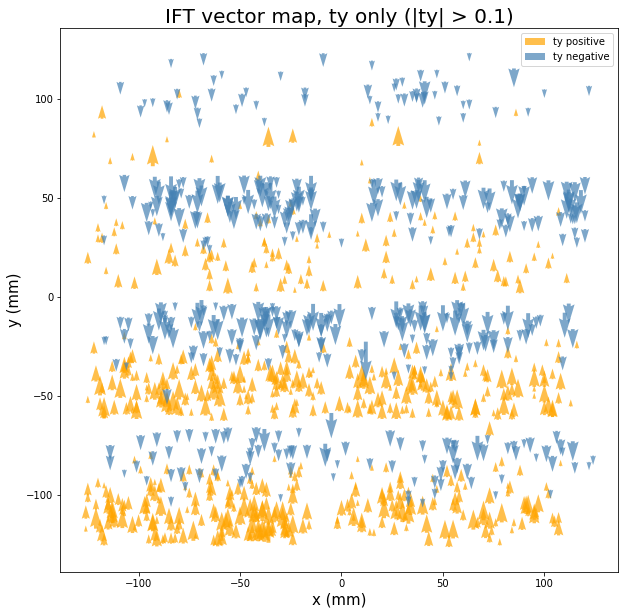

In [51]:
plt.figure(figsize=(10,10))

ty_pos=ift_filter[ift_filter['ty']>=0]
ty_neg=ift_filter[ift_filter['ty']<0]
plt.quiver(ty_pos['x'], ty_pos['y'], np.zeros(len(ty_pos['ty'])), ty_pos['ty'], color='orange', alpha=0.7, width=0.007,label='ty positive')
plt.quiver(ty_neg['x'], ty_neg['y'], np.zeros(len(ty_neg['ty'])), ty_neg['ty'], color='steelblue', alpha=0.7, width=0.007,label='ty negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('IFT vector map, ty only (|ty| > 0.1)', fontsize=20)

plt.legend(loc='upper right')
plt.show()

In [52]:
y_bins=np.linspace(-125,125,250)
cutift_np=cut_ift.to_numpy()
binned_cut_ift = np.digitize(cut_ift['y'], y_bins)
avg_arr=[]
for i in range(max(binned_cut_ift)):
    avg_arr.append([np.mean(cutift_np[:,6][np.where(binned_cut_ift==i)]),i])
avg_arr_np=np.array(avg_arr)

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
avg_arr_np[:,1]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [ ]:
max(cut_emu[:,1])

In [ ]:
min(cut_emu[:,1])

In [ ]:
# need fix
# rot_emu=(z_rot, x_rot, y_rot, tx_rot, ty_rot, tz_rot)
cut_emu=rot_emu[abs(rot_emu[:,4]-mean_emu)<0.1]
cut_emu=cut_emu[abs(cut_emu[:,4])>0.05]
emu_y_bins=np.linspace(min(cut_emu[:,1]),max(cut_emu[:,1]),100)
binned_cut_emu = np.digitize(cut_emu[:,1], emu_y_bins)
avg_emu_arr=[]
for i in range(max(binned_cut_emu)):
    avg_emu_arr.append([np.mean(cut_emu[:,3][np.where(binned_cut_emu==i)]),i])
avg_emu_arr_np=np.array(avg_emu_arr)
plt.figure(figsize=(8,8))
plt.scatter(avg_emu_arr_np[:,0],(avg_emu_arr_np[:,1]*(max(cut_emu[:,1])-min(cut_emu[:,1]))/100+min(cut_emu[:,1])))
plt.xlabel('ty average')
plt.ylabel('y (mm)')
plt.title('Emulsion, ty average along y axis, 0.05<|ty|<0.1, after rotation, before extrapolation')

In [ ]:
#rot_emu=np.array((z_rot, x_rot, y_rot, tx_rot, ty_rot, tz_rot)).T
plt.figure(figsize=(10,10))
cut_emu=rot_emu[abs(rot_emu[:,4]-mean_emu)>0.5]
#cut_emu=cut_emu[abs(cut_emu[:,4])>0.05]
ty_pos=cut_emu[cut_emu[:,4]>=0]
ty_neg=cut_emu[cut_emu[:,4]<0]
plt.quiver(ty_pos[:,1], ty_pos[:,2], np.zeros(len(ty_pos[:,4])), ty_pos[:,4], color='orange', alpha=0.7, width=0.003,label='ty positive')
plt.quiver(ty_neg[:,1], ty_neg[:,2], np.zeros(len(ty_neg[:,4])), ty_neg[:,4], color='steelblue', alpha=0.7, width=0.003,label='ty negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('Emulsion last layer vector map, showing ty vector(|ty-emu_mean|>0.5)', fontsize=20)

plt.legend(loc='upper right')
print('emu_mean=',emu_mean)
plt.show()

In [ ]:
#rot_emu=np.array((z_rot, x_rot, y_rot, tx_rot, ty_rot, tz_rot)).T
plt.figure(figsize=(10,10))
cut_emu=rot_emu[abs(rot_emu[:,4]-mean_emu)>0.7]
#cut_emu=cut_emu[abs(cut_emu[:,4])>0.05]
ty_pos=cut_emu[cut_emu[:,4]>=0]
ty_neg=cut_emu[cut_emu[:,4]<0]
plt.quiver(ty_pos[:,1], ty_pos[:,2], np.zeros(len(ty_pos[:,4])), ty_pos[:,4], color='orange', alpha=0.7, width=0.003,label='ty positive')
plt.quiver(ty_neg[:,1], ty_neg[:,2], np.zeros(len(ty_neg[:,4])), ty_neg[:,4], color='steelblue', alpha=0.7, width=0.003,label='ty negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('Emulsion last layer vector map, showing ty vector(|ty-emu_mean|>0.7)', fontsize=20)

plt.legend(loc='upper right')
print('emu_mean=',emu_mean)
plt.show()

### IFT Extrapolation to second and third layers

In [ ]:
# Unique z coordinates in IFT layers
print('First layer',np.unique(z_FIRST))
print('Second layer',np.unique(z_SEC))
print('Last layer',np.unique(z_THIRD))

In [ ]:
def CoorShift_ift(x, y, z1, z2, tx, ty):

    z_new = z2
    x_new = (x) + (z2-z1)*tx
    y_new = (y) + (z2-z1)*ty

    new_dict = {'x': x_new, 'y': y_new, 'z': z_new, 'tx': tx, 'ty': ty}
    return pd.DataFrame(new_dict)

In [ ]:
shift_cut_ift=CoorShift_ift(cut_ift['x'],cut_ift['y'],cut_ift['z'],270,cut_ift['tx'],cut_ift['ty'])

In [ ]:
cut_ift

In [ ]:
j=1
print(cut_ift['y'].iloc[j]+(270-cut_ift['z'].iloc[j])*cut_ift['ty'].iloc[j])
print(cut_ift['x'].iloc[j]+(270-cut_ift['z'].iloc[j])*cut_ift['tx'].iloc[j])

In [ ]:
shift_cut_ift

In [ ]:
plt.figure(figsize=(10,10))

ty_pos_first=cut_ift[cut_ift['ty']>=0]
ty_neg_first=cut_ift[cut_ift['ty']<0]

ty_pos=shift_cut_ift[shift_cut_ift['ty']>=0]
ty_neg=shift_cut_ift[shift_cut_ift['ty']<0]
plt.quiver(ty_pos['x'], ty_pos['y'], np.zeros(len(ty_pos['ty'])), ty_pos['ty'], color='orange', alpha=0.7, width=0.003,label='shifted ty positive')
plt.quiver(ty_neg['x'], ty_neg['y'], np.zeros(len(ty_neg['ty'])), ty_neg['ty'], color='steelblue', alpha=0.7, width=0.003,label='shifted ty negative')

plt.quiver(ty_pos_first['x'], ty_pos_first['y'], np.zeros(len(ty_pos_first['ty'])), ty_pos_first['ty'], color='red', alpha=0.7, width=0.003,label='first layer ty positive')
plt.quiver(ty_neg_first['x'], ty_neg_first['y'], np.zeros(len(ty_neg_first['ty'])), ty_neg_first['ty'], color='lblue', alpha=0.7, width=0.003,label='first layer ty negative')


plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('IFT "first" layer vector map, shifted to second layer at z=270)', fontsize=20)

plt.legend(loc='upper right')
print('ift_mean=',ift_mean)
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
cut_ift=mini_IFT[abs(mini_IFT['ty']-ift_mean)>0.7]
cut_ift=cut_ift[abs(cut_ift['ty'])<1]
ty_pos=cut_ift[cut_ift['ty']>=0]
ty_neg=cut_ift[cut_ift['ty']<0]
plt.quiver(ty_pos['x'], ty_pos['y'], np.zeros(len(ty_pos['ty'])), ty_pos['ty'], color='orange', alpha=0.7, width=0.003,label='ty positive')
plt.quiver(ty_neg['x'], ty_neg['y'], np.zeros(len(ty_neg['ty'])), ty_neg['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('IFT "first" layer vector map, showing ty vector(|ty-ift_mean|>0.7)', fontsize=20)

plt.legend(loc='upper right')
print('ift_mean=',ift_mean)
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
cut_ift2=mini_IFT2[abs(mini_IFT2['ty']-ift_mean)>0.3]
#cut_ift2=cut_ift2[abs(cut_ift2['ty'])>0.05]
ty_pos2=cut_ift2[cut_ift2['ty']>=0]
ty_neg2=cut_ift2[cut_ift2['ty']<0]
plt.quiver(ty_pos2['x'], ty_pos2['y'], np.zeros(len(ty_pos2['ty'])), ty_pos2['ty'], color='orange', alpha=0.7, width=0.003,label='ty positive')
plt.quiver(ty_neg2['x'], ty_neg2['y'], np.zeros(len(ty_neg2['ty'])), ty_neg2['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('IFT "second" layer vector map, showing ty vector(|ty-ift_mean|> 0.3)', fontsize=20)

plt.legend(loc='upper right')
print('ift_mean=',ift_mean)
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
cut_ift3=mini_IFT3[abs(mini_IFT3['ty']-ift_mean)>0.3]
#cut_ift3=cut_ift3[abs(cut_ift3['ty'])>0.05]
ty_pos3=cut_ift3[cut_ift3['ty']>=0]
ty_neg3=cut_ift3[cut_ift3['ty']<0]
plt.quiver(ty_pos3['x'], ty_pos3['y'], np.zeros(len(ty_pos3['ty'])), ty_pos3['ty'], color='orange', alpha=0.7, width=0.003,label='ty positive')
plt.quiver(ty_neg3['x'], ty_neg3['y'], np.zeros(len(ty_neg3['ty'])), ty_neg3['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('IFT "third" layer vector map, showing ty vector(|ty-ift_mean| > 0.3)', fontsize=20)

plt.legend(loc='upper right')
print('ift_mean=',ift_mean)
plt.show()


In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(avg_arr_np[:,0],avg_arr_np[:,1]-125)
plt.xlabel('ty average')
plt.ylabel('y (mm)')
plt.title('IFT, ty average along y axis, 0.05<|ty|<0.1')

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(avg_arr,y_bins*1.25)
plt.xlabel('ty average')
plt.ylabel('y (mm)')
plt.title('IFT ty average along y axis')

In [ ]:
plt.figure(figsize=(10,10))
cut_ift=mini_IFT[abs(mini_IFT['tx'])>0.1]
tx_pos=cut_ift[cut_ift['tx']>=0]
tx_neg=cut_ift[cut_ift['tx']<0]
plt.quiver(ty_pos['x'], ty_pos['y'], tx_pos['tx'],np.zeros(len(tx_pos['tx'])),  color='orange', alpha=0.7, width=0.003,label='tx positive')
plt.quiver(ty_neg['x'], ty_neg['y'],tx_neg['tx'],np.zeros(len(tx_neg['tx'])), color='steelblue', alpha=0.7, width=0.003,label='tx negative')
plt.xlabel('x (mm)', fontsize=15)

plt.ylabel('y (mm)', fontsize=15)
plt.title('IFT vector map, tx only (|tx|>0.1)', fontsize=20)

plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
emu_ty_mean=np.nanmean(phi_emu_tmp)
cut_emu=emu_filter[abs(emu_filter['ty_last']-emu_ty_mean)<0.1]
cut_emu=cut_emu[abs(cut_emu['ty_last']-emu_ty_mean)>0.05]

ty_pos_emu=cut_emu[cut_emu['ty_last']>=0]
ty_neg_emu=cut_emu[cut_emu['ty_last']<0]



plt.quiver(ty_pos_emu['x_last'],ty_pos_emu['y_last'],np.zeros(len(ty_pos_emu['tx_last'])), ty_pos_emu['ty_last'], color='orange', alpha=0.7, width=0.003,label='positive ty')
plt.quiver(ty_neg_emu['x_last'],ty_neg_emu['y_last'],np.zeros(len(ty_neg_emu['tx_last'])), ty_neg_emu['ty_last'], color='steelblue', alpha=0.7, width=0.003,label='negative ty')

plt.xlabel('x (mm)', fontsize=15)
plt.ylabel('y (mm)', fontsize=15)
plt.title('emulsion vector map, ty only (0.05 < |ty-emu_ty_mean| < 0.1)', fontsize=20)

plt.legend(loc='upper right')
print('emulsion ty mean after coordinate shift =',emu_ty_mean)
plt.show()

In [ ]:
emu_filter

In [ ]:
np.sin(Delta_phi)

In [ ]:
np.cos(Delta_phi)

In [ ]:
emulsion_20['y_last'].iloc[0]

In [ ]:
50000*0.01159+(emulsion_20['y_last'].iloc[0]-50000)*np.cos(Delta_phi)+50000

In [ ]:
Delta_phi = delta_phi
xc, yc, zc = 70000, 50000, 0
def CoorShift_zy(x, y, tx_emu, ty_emu):
    z = np.zeros(len(x))
    theta_emu, phi_emu = AngleCorr_yz(tx_emu, ty_emu)

    z_new = (z-zc)*np.cos(Delta_phi) - (y-yc)*np.sin(Delta_phi) + zc
    y_new = (z-zc)*np.sin(Delta_phi) + (y-yc)*np.cos(Delta_phi) + yc

    tz_new = np.cos(phi_emu + Delta_phi) * np.sin(theta_emu)
    ty_new = np.sin(phi_emu + Delta_phi) * np.sin(theta_emu) / tz_new
    tx_new = np.cos(theta_emu) / tz_new

    dict = {'x_last': x, 'y_last': y_new, 'z_last': z_new, 'tx_last': tx_new, 'ty_last': ty_new, 'tz_last': tz_new}
    return pd.DataFrame(dict)

In [ ]:
rot = CoorShift_zy(ak.Array(emulsion_20['x_last']), ak.Array(emulsion_20['y_last']), ak.Array(emulsion_20['tx_last']), ak.Array(emulsion_20['ty_last']))

In [ ]:
rot

In [ ]:
def Filter(data, ty_cut):
    mean = np.mean(data['ty_last'])
    filter_greater = data[data['ty_last'] > mean + ty_cut]
    filter_less = data[data['ty_last'] < mean - ty_cut]
    filter = pd.concat([filter_less, filter_greater])
    print(f'{len(filter)/len(data)*100}% data is selected after cut')
    return filter

ty_cut = 0.05
emu_filter = Filter(emulsion_20, ty_cut)
rot_emu_filter = Filter(rot, ty_cut)


In [ ]:
def Filter2(data, ty_cut):
    mean = np.mean(data['ty'])
    filter_greater = data[data['ty'] > mean + ty_cut]
    filter_less = data[data['ty'] < mean - ty_cut]
    filter = pd.concat([filter_less, filter_greater])
    print(f'{len(filter)/len(data)*100}% data is selected after cut')
    return filter

ift_filter = Filter2(mini_IFT, ty_cut)
emu_pred_filter = Filter2(emu_pred, ty_cut)

In [ ]:
def vector_plot(data, name, color='blue', include_tx=False):
    plt.figure(figsize=(10, 10))    
    #plt.scatter(data['x'], data['y'], marker='.', alpha=0.7, label=f'{name}')
    pos = data[data['ty']>0]
    neg = data[data['ty']<0]
    if include_tx:
        plt.quiver(pos['x'], pos['y'], pos['tx'], pos['ty'], color='orange', alpha=0.7, width=0.003, scale=14, label=f'{name} ty > 0')
        plt.quiver(neg['x'], neg['y'], neg['tx'], neg['ty'], color='steelblue', alpha=0.7, width=0.003, scale=14, label=f'{name} ty < 0')
        #plt.quiver(data['x'], data['y'], data['tx'], data['ty'], color=color, alpha=0.7, width=0.003, scale=14)
    else:
        plt.quiver(pos['x'], pos['y'], 0, pos['ty'], color='orange', alpha=0.7, width=0.003, scale=14, label=f'{name} ty > 0')
        plt.quiver(neg['x'], neg['y'], 0, neg['ty'], color='steelblue', alpha=0.7, width=0.003, scale=14, label=f'{name} ty < 0')
        #plt.quiver(data['x'], data['y'], 0, data['ty'], color=color, alpha=0.7, width=0.003, scale=14)
    plt.xlabel('x (mm)', fontsize=15)
    plt.ylabel('y (mm)', fontsize=15)
    plt.title(f'{name} (|ty| > {ty_cut})', fontsize=20)

#vector_plot(ift_filter, 'IFT', color='orange', include_tx=True)
#vector_plot(rot_emu_filter, 'Emulsion Detector', color='blue', include_tx=True)
vector_plot(emu_pred_filter, 'Emulsion ty vector field, (|ty|>0.05)', include_tx=False)

plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

ty_pos_emu=emu_filter[emu_filter['ty_last']>=0]
ty_neg_emu=emu_filter[emu_filter['ty_last']<0]

plt.quiver(ty_pos_emu['x_last'],ty_pos_emu['y_last'],np.zeros(len(ty_pos_emu['tx_last'])), ty_pos_emu['ty_last'], color='orange', alpha=0.7, width=0.003,label='positive ty')
plt.quiver(ty_neg_emu['x_last'],ty_neg_emu['y_last'],np.zeros(len(ty_neg_emu['tx_last'])), ty_neg_emu['ty_last'], color='steelblue', alpha=0.7, width=0.003,label='negative ty')

plt.xlabel('x (mm)', fontsize=15)
plt.ylabel('y (mm)', fontsize=15)
plt.title('emulsion vector map, ty only (|ty| > 0.3)', fontsize=20)

plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
#plt.scatter(emu_filter['x'], emu_filter['y'], marker='.', alpha=0.7, label='Emulsion 65.5 mm distance')
plt.scatter(ift_filter['x'], ift_filter['y'], marker='.', alpha=0.7, label='IFT')
#plt.quiver(emu_filter['x'], emu_filter['y'], 0, emu_filter['ty'], color='blue', alpha=0.5, width=0.007)
plt.quiver(ift_filter['x'], ift_filter['y'], ift_filter['tx'], ift_filter['ty'], color='orange', alpha=0.5, width=0.007)
plt.xlabel('Predicted x in IFT Coordinate (mm)', fontsize=15)
plt.ylabel('Predicted y in IFT Coordinate (mm)', fontsize=15)
plt.title('Projection of Emulsion (|ty| > 0.1mrad)', fontsize=20)

plt.legend()
plt.show()

In [ ]:
def win_selc(win_size_x, win_size_y, x_cen, y_cen, data, x_name='', y_name=''):
    xmin, xmax, ymin, ymax = (x_cen - win_size_x/2), (x_cen + win_size_x/2), (y_cen - win_size_y/2), (y_cen + win_size_y/2)

    win = data[data[x_name] >= xmin]
    win = win[win[x_name] <= xmax]
    win = win[win[y_name] >= ymin]
    win = win[win[y_name] <= ymax]
    
    return win

In [ ]:
win_size = 2000
x_cen, y_cen = 60000, 60000
xmin, xmax, ymin, ymax = (x_cen - win_size/2), (x_cen + win_size/2), (y_cen - win_size/2), (y_cen + win_size/2)

emu_win = emulsion_20[emulsion_20['x_last'] >= xmin]
emu_win = emu_win[emu_win['x_last'] <= xmax]
emu_win = emu_win[emu_win['y_last'] >= ymin]
emu_win = emu_win[emu_win['y_last'] <= ymax]
emu_win

In [ ]:
# the function works
win_selc(2000, 2000, 60000, 60000, emulsion_20, x_name='x_last', y_name='y_last')

In [ ]:
plt.figure(figsize=(20, 10))

emu_pred_win = win_selc(64, 22, 20, 20, emu_pred, x_name='x', y_name='y')
IFT_win = win_selc(20, 20, 20, 20, mini_IFT, x_name='x', y_name='y')


plt.subplot(1, 2, 1)

plt.scatter(IFT_win['x'], IFT_win['y'], color='orange', label='IFT (20 by 20)')
plt.title('20mm by 20mm IFT WIndow', fontsize=15)
plt.legend()
#plt.scatter(emu_pred_win['x'], emu_pred_win['y'], marker='.', color='orange')

plt.subplot(1, 2, 2) # index 2
plt.scatter(emu_pred_win['x'], emu_pred_win['y'], marker='.', label='Emulsion Detector (64 by 22)')

plt.scatter(IFT_win['x'], IFT_win['y'], marker='o', label='IFT (20 by 20)')
plt.title('Adding 64mm by 64mm Emulsion Detector Window', fontsize=15)
plt.legend()
plt.show()




In [ ]:
IFT_win

### Comments: resolution in y-direction = 25um; resolution in x-direction = 800um. Then, we set dy, dx = 10um, 10um, and set for 100 steps.

In [ ]:
small_ift_win = win_selc(10, 10, -20, -20, mini_IFT, x_name='x', y_name='y')

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(small_ift_win ['x'], small_ift_win ['y'], color='orange', label='IFT (10 mm by 10 mm)')
plt.title('10mm by 10mm IFT WIndow', fontsize=15)
plt.legend()

In [ ]:
# 4. Nearest track function

def nearest(A_array,all_ift_track_arr):
    nearest_array=pd.DataFrame()
    mindiff2=10000
    xdiff2=0
    ydiff2=0
    nearest_ift_index=0

    for i in range(len(A_array)):
        for j in range(len(all_ift_track_arr)):
            xdiff2=(A_array["x"].iloc[i]-all_ift_track_arr["x"].iloc[j])**2
            ydiff2=(A_array["x"].iloc[i]-all_ift_track_arr["x"].iloc[j])**2
            
            if(
                xdiff2+ydiff2<mindiff2
                ):
                mindiff2=xdiff2+ydiff2
                nearest_ift_index=j
        nearest_array.append(all_ift_track_arr.iloc[nearest_ift_index])
        
    return nearest_array

In [ ]:
# Chi2 calculating function

def Chi2(A_arr,ift_array):
        
    # 1. For each track in A_arr, calculate nearest track in all_tracks
    nearest_arr=nearest(A_arr,ift_array)
    
    # 2. Calculate Chi2 for all tracks
    
    # ty Chi2 val  
    ty_chi2=0
    for i in range(len(nearest_arr)):
        # square(ty of first track - ty of second track), omit resolution for testing
        ty_chi2+=(A_arr["ty"].iloc[i]-nearest_arr["ty"].iloc[i])**2
    
    # x Chi2 val
    x_Chi2=0
    # y Chi2 val
    y_Chi2=0
    
    total_chi2=ty_chi2+x_Chi2+y_Chi2
    
    return total_chi2

In [ ]:
A['x'].iloc[3]

In [ ]:
(A["ty"].iloc[0]-small_ift_win["ty"].iloc[0])**2

In [ ]:
# ift array: small_ift_win

# size of Total IFT area
lenx=10
leny=10
# size of square used to scan
scanx=5
scany=5
# current coordinate of square
xmin=-25
xmax=xmin+scanx
ymin=-25
ymax=ymin+scany
# step size
stepsize=0.1

# square A used to scan:
A=win_selc(5, 5, -22.5, -22.5, mini_IFT, x_name='x', y_name='y')


# chi2 value array
chi2arr=[]

for i in range((leny-scany)*10):
    for j in range((lenx-scanx)*10):
        
        
        for k in range(len(small_ift_win)):
            chi2arr.append(Chi2(A,small_ift_win))
            
    
            
        # increment x
        xmin+=stepsize
        A['x']=A['x']+stepsize
    # reset x coordinate to most left side
    A['x']=A['x']-(lenx-scanx)
    xmin=xmin-(lenx-scanx)
    # increment y
    ymin+=stepsize
    A['y']=A['y']+stepsize
    

In [ ]:
dy, dx = np.linspace(-0.5, 0.5, 101), np.linspace(-20, 20, 101)
dx, dy

In [ ]:
from scipy.spatial.distance import cdist

x_resol2, y_resol2 = np.mean(mini_IFT['x error'])**2, np.mean(mini_IFT['y error'])**2
emu = np.column_stack((emu_pred_win['x']/(x_resol2), emu_pred_win['y']/(y_resol2)))
total_chi2 = np.zeros([len(dx), len(dy)])
#for i in tqdm(range(len(dx))):
i, j = 0, 0
testiftx = IFT_win['x'] + dx[i] 
testifty = IFT_win['y'] + dy[j]
# using ty calculate the chi2
testift = np.column_stack((testiftx/x_resol2, testifty/y_resol2))
cdist(testift,emu).min(axis=1)
#total_chi2[i, j] = np.sum(cdist(testift,emu).min(axis=1))
#total_chi2

In [ ]:
from scipy.spatial.distance import cdist

x_resol2, y_resol2 = np.mean(mini_IFT['x error'])**2, np.mean(mini_IFT['y error'])**2
emu = np.column_stack((emu_pred_win['x']/(x_resol2), emu_pred_win['y']/(y_resol2)))
total_chi2 = np.zeros([len(dx), len(dy)])
for i in tqdm(range(len(dx))):
#i, j = 0, 0
    testiftx = IFT_win['x'] + dx[i] 
    #for j in range(len(dy)):
      testifty = IFT_win['y'] + dy[j]

        testift = np.column_stack((testiftx/x_resol2, testifty/y_resol2))

        total_chi2[i, j] = np.sum(cdist(testift,emu).min(axis=1))
total_chi2

In [ ]:
import seaborn as sns
plt.figure(figsize=(14, 10))
data = pd.DataFrame(total_chi2, columns=dx, index=dy)
sns.heatmap(data, annot=False)#, annot_kws={"size": 12})
plt.xlabel(r'Delta x', fontsize=15)
plt.ylabel(r'Delta y', fontsize=15)
plt.title('Total Chi2 Contour Plot', fontsize=20)
plt.show()

In [ ]:
np.max(total_chi2)